In [ ]:
import pandas as pd

# Jika file CSV
df = pd.read_excel('label.xlsx')
# Mengubah nama kolom
df.columns = ['timestamp', 'username', 'comment', 'likeCount', 'label']
# Tampilkan data untuk melihat kolom-kolomnya
df.head()


,timestamp,username,comment,likeCount,label
0,2019-10-11T15:12:40Z,@MenjadiManusia,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",2506,netral
1,2019-10-11T17:47:05Z,@sandiikin,Manungsa = Manunggaling Rasa,26,netral
2,2019-10-12T01:58:29Z,@staypray8954,Tertata sekali... 💚💚💚,15,empati
3,2019-10-12T04:15:43Z,@dinipraba7035,kalau adhd bukan gangguan mental yah?,6,netral
4,2019-10-12T04:20:53Z,@staypray8954,@@dinipraba7035 lebih baik konsul sama pakarny...,8,netral


# **EDA**

## information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1500 non-null   object
 1   username   1500 non-null   object
 2   comment    1500 non-null   object
 3   likeCount  1500 non-null   int64 
 4   label      1500 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


In [ ]:
df.describe()

,likeCount
count,1500.000000
mean,6.568667
std,85.002421
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2506.000000


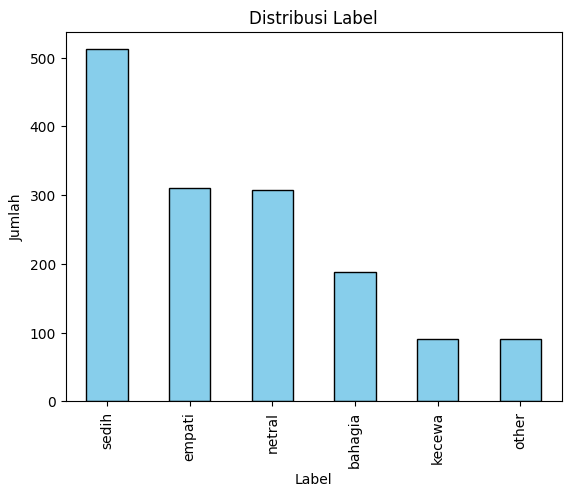

In [ ]:
import matplotlib.pyplot as plt

# Membuat bar plot untuk distribusi label
label_distribution = df['label'].value_counts()

# Membuat plot
label_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menampilkan grafik
plt.show()

## check missing value & duplicate

In [ ]:
df.isnull().sum()

,0
timestamp,0
username,0
comment,0
likeCount,0
label,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
# Menampilkan semua baris yang duplikat berdasarkan seluruh kolom
duplicates = df[df.duplicated(keep=False)]
print(duplicates)


                timestamp              username  \
227  2022-03-01T05:33:23Z  @firdhaprblsmnaa1159   
229  2022-03-01T05:33:23Z  @firdhaprblsmnaa1159   

                                               comment  likeCount  label  
227  Ketakutan sm kuliah apa itu wajar? Semua badan...          1  sedih  
229  Ketakutan sm kuliah apa itu wajar? Semua badan...          1  sedih  


In [ ]:
# Menghapus baris duplikat berdasarkan semua kolom
df = df.drop_duplicates()

# **Preprocessing**

## data cleaning & lowercase

In [ ]:
#menghapus kolom yang tidak relevan untuk dilakukan klasifikasi
drop_columns = ['timestamp', 'username','likeCount']
df = df.drop(columns=drop_columns)

In [ ]:
# Menampilkan baris yang memiliki tipe 'int' di kolom 'comment'
int_rows = df[df['comment'].apply(lambda x: isinstance(x, int))]
print(int_rows)


    comment  label
354       0  other
414       0  other


In [ ]:
df['comment'] = df['comment'].apply(lambda x: str(x) if x is not None else '')

In [ ]:
import re
import html

# Fungsi untuk menghapus tag HTML menggunakan regex
def remove_html_tags(text):
    text = html.unescape(text)  # Mengonversi entitas HTML ke karakter asli
    clean_text = re.sub(r'<.*?>', '', text)  # Regex untuk menghapus semua tag HTML
    return clean_text

df['comment_rmv_html'] = df['comment'].apply(remove_html_tags)
df.head(5)

,comment,label,comment_rmv_html
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...


In [ ]:
# import pandas as pd
# import re

# # Fungsi untuk mendeteksi emotikon
# def detect_emoticons(text):
#     # Regex untuk menemukan emotikon yang terdiri dari karakter non-alfabet (emoji)
#     emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]'

#     # Mencari semua emotikon dalam teks
#     emoticons = re.findall(emoticon_pattern, text)

#     return emoticons


# # Terapkan fungsi detect_emoticons ke setiap baris teks dalam DataFrame
# df['emoticons'] = df['comment_rmv_html'].apply(detect_emoticons)

# # Gabungkan semua emotikon dari setiap baris menjadi satu list
# all_emoticons = sum(df['emoticons'], [])

# # Dapatkan hanya emotikon unik
# unique_emoticons = set(all_emoticons)

# # Tampilkan hasil
# print("Unique Emoticons:", unique_emoticons)


In [ ]:
# Mapping emotikon ke teks
emoticon_map = {
    "💛": "kasih sayang", "🖤": "kasih sayang", "💖": "kasih sayang", "❤": "kasih sayang", "💕": "kasih sayang",
    "💙": "kasih sayang", "❣": "kasih sayang", "♥": "kasih sayang", "💞": "kasih sayang", "💗": "kasih sayang",
    "💚": "kasih sayang", "🤍": "kasih sayang", "💜": "kasih sayang", "🥰": "kasih sayang", "🤞": "kasih sayang",
    "🤗": "kasih sayang", "😘": "kasih sayang",

    "🙏": "terima kasih",

    "😓": "sedih", "🙁": "sedih", "😔": "sedih", "😣": "sedih", "😞": "sedih", "😭": "sedih", "☹": "sedih",
    "😩": "sedih", "😢": "sedih", "😫": "sedih", "😖": "sedih", "😕": "sedih", "🤧": "sedih", "😥": "sedih",
    "😪": "sedih", "🤕": "sedih",

    "🦾": "semangat", "💪": "semangat", "🔥": "semangat", "😉": "semangat", "⭐": "semangat", "🙌": "semangat",
    "🤝": "semangat",

    "😀": "bahagia", "😊": "bahagia", "😍": "bahagia", "😆": "bahagia", "🌻": "bahagia", "✨": "bahagia",
    "😇": "bahagia", "😁": "bahagia", "😗": "bahagia", "😚": "bahagia", "🌹": "bahagia", "👼": "bahagia",
    "🤭": "bahagia", "✌": "bahagia",

    "😑": "tidak senang", "😒": "tidak senang", "🙃": "tidak senang", "🙂": "tidak senang", "🥴": "tidak senang",

    "👍": "setuju",

    "🥺": "memohon",

    "😠": "marah", "😈": "marah",

    "💔": "sakit hati",

    "🤣": "tertawa", "😂": "tertawa", "😅": "tertawa",

    "😶": "terdiam",

    "👉": "menunjuk",

    "🤦": "kecewa",

    "🤲": "berdoa",

    "💡": "ide",

    "🍃": "tenang", "😌": "tenang",

    "👃": "penciuman",

    "🙉": "malu", "😬": "malu",

    # Simbol Teks
    ":)": "senang", ";)": "senang", ":(" : "sedih", ":-)": "senang", ";-)" : "berkedip", ":-(" : "sedih", ";(" : "sedih", ":')" : "sedih",
    ":D": "senang", ":P": "ceria", ":/": "bingung", ":'(": "sedih", ":|": "datar", "-_-": "datar"
}

# Fungsi untuk mengganti emotikon dengan teks dan menambahkan spasi
def replace_emoticons_with_text(text):
    for emoticon, replacement in emoticon_map.items():
        text = text.replace(emoticon, replacement + " ")  # Menambahkan spasi setelah teks
    return text

# Terapkan penggantian emotikon ke setiap komentar
df['comment_emoticon'] = df['comment_rmv_html'].apply(replace_emoticons_with_text)

# Tampilkan hasil
df.head()


,comment,label,comment_rmv_html,comment_emoticon
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re

# Fungsi untuk menghapus URL, mentions, hashtag, tanda baca, dan angka
def remove_noise(text):

    # Menghapus URL
    text = re.sub(r'http\S+|www\S+', '', text)

    # Menghapus mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Menghapus hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # # Menghapus tanda baca (kecuali emoji)
    # # Mempertahankan emoji dan simbol Unicode
    # text = re.sub(r'[^\w\s\U00010000-\U0010FFFF]', '', text)

    # # Menghapus emotikon berbasis teks (misalnya :) :( ;P)
    # text = re.sub(r'[:;=8]([)D(\\]/|\\])|[-^]?[)D(\\]/|\\]', '', text)
    return text

# Terapkan pembersihan pada kolom 'tweet'
df['comment_clean'] = df['comment_emoticon'].apply(remove_noise)

# Tampilkan DataFrame yang sudah diproses
df


,comment,label,comment_rmv_html,comment_emoticon,comment_clean
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...",Ingat kamu juga manusia Penjelasan kesehatan m...
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,Manungsa Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,Tertata sekali kasih sayang kasih sayang kasih...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,lebih baik konsul sama pakarnya psikiater ata...
...,...,...,...,...,...
1495,cure for your depression: stop using socmeds.....,bahagia,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....,cure for your depression stop using socmedsnev...
1496,Menerima semua aspek kehidupan dan bertumbuh d...,empati,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...
1497,🖤🖤🖤,empati,🖤🖤🖤,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang
1498,terima kasih terima kasih terima kasih,bahagia,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih


In [ ]:
# Mengecek berapa banyak baris yang kosong setelah pembersihan
empty_rows = df[df['comment_clean'] == '']
print(f"Jumlah baris kosong: {empty_rows.shape[0]}")


Jumlah baris kosong: 32


In [ ]:
# Menampilkan baris yang memiliki NaN atau string kosong di kolom 'comment_clean'
empty_rows = df[df['comment_clean'].isna() | (df['comment_clean'] == '')]

# Tampilkan hasil
empty_rows


,comment,label,comment_rmv_html,comment_emoticon,comment_clean
6,"<a href=""https://www.youtube.com/watch?v=LeFkk...",netral,1:02:20,1:02:20,
13,"<a href=""https://www.youtube.com/watch?v=LeFkk...",netral,20:38,20:38,
21,🫂,other,🫂,🫂,
23,;,other,;,;,
30,"<a href=""https://www.youtube.com/watch?v=LeFkk...",netral,20:00,20:00,
31,"<a href=""https://www.youtube.com/watch?v=LeFkk...",netral,08:04,08:04,
56,🥲,other,🥲,🥲,
73,.,other,.,.,
179,;,other,;,;,
214,;,other,;,;,


In [ ]:
def lowercase(text):
    return text.lower()

df['comment_clean'] = df['comment_clean'].apply(lowercase)

df

,comment,label,comment_rmv_html,comment_emoticon,comment_clean
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...",ingat kamu juga manusia penjelasan kesehatan m...
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,manungsa manunggaling rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,tertata sekali kasih sayang kasih sayang kasih...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,lebih baik konsul sama pakarnya psikiater ata...
...,...,...,...,...,...
1495,cure for your depression: stop using socmeds.....,bahagia,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....,cure for your depression stop using socmedsnev...
1496,Menerima semua aspek kehidupan dan bertumbuh d...,empati,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...,menerima semua aspek kehidupan dan bertumbuh d...
1497,🖤🖤🖤,empati,🖤🖤🖤,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang
1498,terima kasih terima kasih terima kasih,bahagia,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih


## normalisasi

In [ ]:
import pandas as pd

# Membaca kamus alay dan kamus singkatan
kamus_singkatan = pd.read_csv('kamus_singkatan.csv')

# Menggabungkan kamus alay dan kamus singkatan menjadi satu kamus
kamus2 = kamus_singkatan.set_index('singkatan')['asli'].to_dict()


# Fungsi untuk normalisasi kata singkatan
def normalize_abbreviations(text):
    words = text.split()
    normalized_words = [kamus2[word.lower()] if word.lower() in kamus2 else word for word in words]
    return ' '.join(normalized_words)

# Menerapkan fungsi normalisasi ke kolom teks
df['comment_norm'] = df['comment_clean'].apply(normalize_abbreviations)

# Menampilkan 50 baris pertama setelah normalisasi
df.head()


,comment,label,comment_rmv_html,comment_emoticon,comment_clean,comment_norm
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...",ingat kamu juga manusia penjelasan kesehatan m...,ingat kamu juga manusia penjelasan kesehatan m...
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,manungsa manunggaling rasa,manungsa manunggaling rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,tertata sekali kasih sayang kasih sayang kasih...,tertata sekali kasih sayang kasih sayang kasih...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah,kalau adhd bukan gangguan mental yah
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,lebih baik konsul sama pakarnya psikiater ata...,lebih baik konsul sama pakarnya psikiater atau...


## translate

In [ ]:
!pip install langdetect
!pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=d64691134f98455d09c372a0ae44a3d65863a67451868d89f791fd7152e71100
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.1 MB/s eta 0:00:00


In [ ]:
from langdetect import detect
from deep_translator import GoogleTranslator

def translate_if_english(text):
    try:
        if detect(text) == 'en':  # hanya translate bahasa Inggris
            return GoogleTranslator(source='en', target='id').translate(text)
        else:
            return text
    except:
        return text

df['comment_translate'] = df['comment_norm'].apply(translate_if_english)

# df.loc[df['comment_translate'] == df['comment_norm'], 'comment_translate'] = \
#     df.loc[df['comment_translate'] == df['comment_norm'], 'comment_norm'].apply(
#         lambda x: GoogleTranslator(source='auto', target='id').translate(x)
#     )

## tokenizing

In [ ]:
# Mengimpor modul nltk untuk pemrosesan bahasa alami
import nltk

# Mengunduh semua data yang diperlukan oleh nltk
nltk.download('all')
nltk.download('punkt_tab')

# Mengimpor fungsi untuk tokenisasi kalimat dan kata
from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
# Mengubah teks yang sudah dibersihkan stopword menjadi token (kata-kata)
df['comment_tokens'] = df['comment_translate'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama dari DataFrame setelah tokenisasi
df


,comment,label,comment_rmv_html,comment_emoticon,comment_clean,comment_norm,comment_translate,comment_tokens
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...",ingat kamu juga manusia penjelasan kesehatan m...,ingat kamu juga manusia penjelasan kesehatan m...,ingat kamu juga manusia penjelasan kesehatan m...,"[ingat, kamu, juga, manusia, penjelasan, keseh..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,manungsa manunggaling rasa,manungsa manunggaling rasa,manungsa manunggaling rasa,"[manungsa, manunggaling, rasa]"
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,tertata sekali kasih sayang kasih sayang kasih...,tertata sekali kasih sayang kasih sayang kasih...,tertata sekali kasih sayang kasih sayang kasih...,"[tertata, sekali, kasih, sayang, kasih, sayang..."
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah,kalau adhd bukan gangguan mental yah,kalau adhd bukan gangguan mental yah,"[kalau, adhd, bukan, gangguan, mental, yah]"
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,lebih baik konsul sama pakarnya psikiater ata...,lebih baik konsul sama pakarnya psikiater atau...,lebih baik konsul sama pakarnya psikiater atau...,"[lebih, baik, konsul, sama, pakarnya, psikiate..."
...,...,...,...,...,...,...,...,...
1495,cure for your depression: stop using socmeds.....,bahagia,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....,cure for your depression stop using socmedsnev...,cure for your depression stop using socmedsnev...,obat untuk depresimu berhenti menggunakan socm...,"[obat, untuk, depresimu, berhenti, menggunakan..."
1496,Menerima semua aspek kehidupan dan bertumbuh d...,empati,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...,menerima semua aspek kehidupan dan bertumbuh d...,menerima semua aspek kehidupan dan bertumbuh d...,menerima semua aspek kehidupan dan bertumbuh d...,"[menerima, semua, aspek, kehidupan, dan, bertu..."
1497,🖤🖤🖤,empati,🖤🖤🖤,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang,"[kasih, sayang, kasih, sayang, kasih, sayang]"
1498,terima kasih terima kasih terima kasih,bahagia,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,"[terima, kasih, terima, kasih, terima, kasih]"


## label encoder dan split

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Menghapus baris dengan NaN pada kolom 'teks_norm'
df.dropna(subset=['comment_tokens'], inplace=True)

# Ambil kolom teks dan label
X = df['comment_tokens']  # teks hasil preprocessing
y = df['label']

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Lihat mapping antara label asli dan numerik
print("Mapping Label Asli ke Angka:")
for i, label in enumerate(le.classes_):
    print(f"{i} = {label}")

# Contoh hasil sebelum & sesudah encoding
print("\nSebelum encoding:")
print(y.head())

print("\nSesudah encoding:")
print(y_encoded[:10])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

# 1. Simpan X_train dan y_train
train_df = pd.DataFrame({'comment_tokens': X_train, 'label': y_train})
train_df.to_csv('train_data.csv', index=False)

# 2. Simpan X_test dan y_test
test_df = pd.DataFrame({'comment_tokens': X_test, 'label': y_test})
test_df.to_csv('test_data.csv', index=False)

Mapping Label Asli ke Angka:
0 = bahagia
1 = empati
2 = kecewa
3 = netral
4 = other
5 = sedih

Sebelum encoding:
0    netral
1    netral
2    empati
3    netral
4    netral
Name: label, dtype: object

Sesudah encoding:
[3 3 1 3 3 3 3 2 1 5]


# **Extraction Features and Model**

##tf-idf

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Baca data train & test
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['comment_tokens']
y_train = train_df['label']

X_test = test_df['comment_tokens']
y_test = test_df['label']

# 2. Inisialisasi TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    stop_words=None,  # atau 'english' jika teks bahasa Inggris
    min_df=1,
    max_df=1.0
)

# 3. Fit-transform untuk data train
X_train_tfidf = vectorizer.fit_transform(X_train)

# 4. Transform data test
X_test_tfidf = vectorizer.transform(X_test)


==================== SVM ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.41      0.47        49
           1       0.78      0.47      0.59       110
           2       1.00      0.03      0.06        34
           3       0.42      0.53      0.46        80
           4       0.67      0.41      0.51        29
           5       0.59      0.90      0.71       148

    accuracy                           0.58       450
   macro avg       0.67      0.46      0.47       450
weighted avg       0.64      0.58      0.55       450



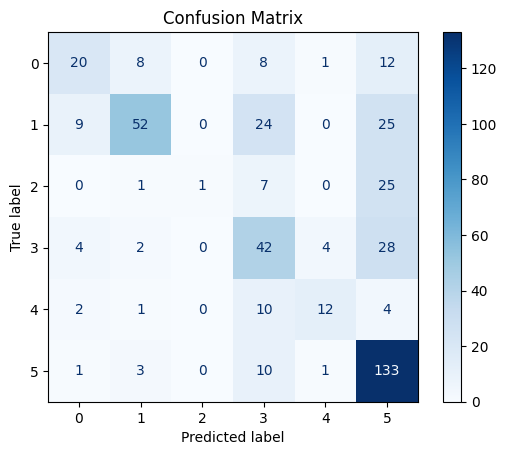


==================== LogisticRegression ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        49
           1       0.71      0.52      0.60       110
           2       0.00      0.00      0.00        34
           3       0.40      0.57      0.47        80
           4       0.00      0.00      0.00        29
           5       0.61      0.89      0.73       148

    accuracy                           0.58       450
   macro avg       0.40      0.42      0.40       450
weighted avg       0.52      0.58      0.53       450



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


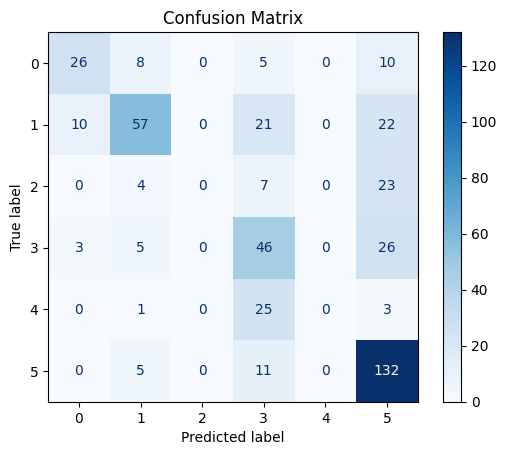


==================== RandomForest ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        49
           1       0.74      0.42      0.53       110
           2       0.50      0.03      0.06        34
           3       0.49      0.46      0.48        80
           4       0.35      0.66      0.46        29
           5       0.59      0.86      0.70       148

    accuracy                           0.56       450
   macro avg       0.54      0.48      0.46       450
weighted avg       0.58      0.56      0.53       450



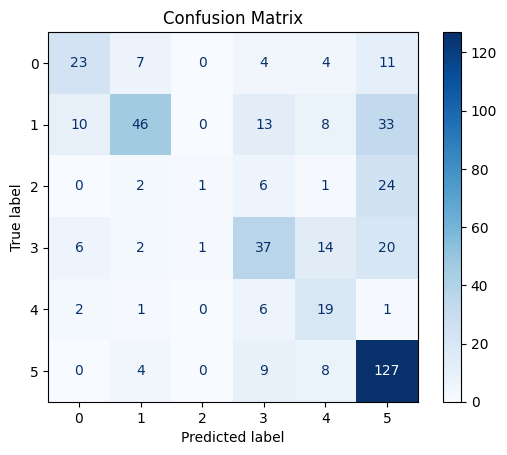

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

models = {
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"\n==================== {name} ====================")

    # Training
    model.fit(X_train_tfidf, y_train)

    # Prediksi
    y_pred = model.predict(X_test_tfidf)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Tampilkan confusion matrix dalam bentuk plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')  # 'Blues' biar warnanya enak dilihat
    plt.title("Confusion Matrix")
    plt.show()


## tf-idf with n-gram

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse
import joblib

# 1. Baca data train & test
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['comment_tokens']
y_train = train_df['label']

X_test = test_df['comment_tokens']
y_test = test_df['label']

# TF-IDF (unigram + bigram) hanya fit di training
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf_n = vectorizer.fit_transform(X_train)

# Transform test set
X_test_tfidf_n = vectorizer.transform(X_test)

# Lihat daftar fitur (kata/n-gram)
print("Daftar fitur (kata/n-gram):")
print(vectorizer.get_feature_names_out())

# Lihat representasi TF-IDF training (5 pertama)
print("\nRepresentasi TF-IDF (training, 5 pertama):")
print(X_train_tfidf_n[:5].toarray())

Daftar fitur (kata/n-gram):
['aaaa' 'aaaa kenapa' 'aamiin' ... 'zolimi' 'zolimi tidak' 'ʖಥ']

Representasi TF-IDF (training, 5 pertama):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

models = {
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"\n==================== {name} ====================")

    # Training
    model.fit(X_train_tfidf_n, y_train)

    # Prediksi
    y_pred = model.predict(X_test_tfidf_n)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



==================== SVM ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.43      0.53        49
           1       0.86      0.39      0.54       110
           2       1.00      0.03      0.06        34
           3       0.53      0.40      0.46        80
           4       0.67      0.48      0.56        29
           5       0.48      0.93      0.63       148

    accuracy                           0.55       450
   macro avg       0.71      0.44      0.46       450
weighted avg       0.66      0.55      0.52       450

Confusion Matrix:
[[ 21   4   0   4   1  19]
 [  8  43   0  12   0  47]
 [  0   0   1   1   0  32]
 [  1   0   0  32   4  43]
 [  0   0   0   6  14   9]
 [  0   3   0   5   2 138]]

==================== LogisticRegression ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.49      0.56        49
           1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.53      0.55        49
           1       0.75      0.39      0.51       110
           2       0.50      0.03      0.06        34
           3       0.47      0.45      0.46        80
           4       0.29      0.62      0.40        29
           5       0.58      0.81      0.67       148

    accuracy                           0.54       450
   macro avg       0.53      0.47      0.44       450
weighted avg       0.58      0.54      0.52       450

Confusion Matrix:
[[ 26   3   0   4   6  10]
 [ 11  43   0  13  10  33]
 [  0   1   1   7   1  24]
 [  4   3   1  36  16  20]
 [  2   1   0   7  18   1]
 [  2   6   0   9  11 120]]


## bag of word

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import save_npz
import joblib

# 1. Baca data train & test
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['comment_tokens']
y_train = train_df['label']

X_test = test_df['comment_tokens']
y_test = test_df['label']

# 2. BoW (CountVectorizer)
vectorizer = CountVectorizer()  # bisa ditambahkan ngram_range=(1,2) jika mau unigram+bigram
X_train_bow = vectorizer.fit_transform(X_train)  # fit + transform data train
X_test_bow = vectorizer.transform(X_test)        # hanya transform data test

# 3. Lihat vocabulary (fitur)
print("Fitur BoW:")
print(vectorizer.get_feature_names_out())

# 4. Preview representasi sparse matrix (hanya 5 pertama)
print("Representasi BoW (5 pertama training):")
print(X_train_bow[:5].toarray())

Fitur BoW:
['aaaa' 'aamiin' 'aamiinsenang' ... 'zikir' 'zolimi' 'ʖಥ']
Representasi BoW (5 pertama training):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

models = {
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"\n==================== {name} ====================")

    # Training
    model.fit(X_train_bow, y_train)

    # Prediksi
    y_pred = model.predict(X_test_bow)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



==================== SVM ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.39      0.42        49
           1       0.79      0.30      0.43       110
           2       0.00      0.00      0.00        34
           3       0.30      0.74      0.43        80
           4       0.00      0.00      0.00        29
           5       0.60      0.70      0.65       148

    accuracy                           0.48       450
   macro avg       0.36      0.35      0.32       450
weighted avg       0.50      0.48      0.44       450

Confusion Matrix:
[[ 19   3   0  21   0   6]
 [ 17  33   0  36   0  24]
 [  0   2   0  12   0  20]
 [  3   0   0  59   0  18]
 [  0   0   0  29   0   0]
 [  2   4   0  38   0 104]]

==================== LogisticRegression ====================


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        49
           1       0.64      0.50      0.56       110
           2       0.31      0.12      0.17        34
           3       0.37      0.65      0.47        80
           4       0.25      0.03      0.06        29
           5       0.69      0.73      0.71       148

    accuracy                           0.55       450
   macro avg       0.47      0.44      0.43       450
weighted avg       0.55      0.55      0.54       450

Confusion Matrix:
[[ 29   6   0   7   1   6]
 [ 12  55   4  26   1  12]
 [  0   4   4  10   0  16]
 [  3   9   1  52   1  14]
 [  2   1   0  25   1   0]
 [  3  11   4  22   0 108]]

==================== RandomForest ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.49      0.53        49
           1       0.74      0.46      0.57       110
           

## bow with n-gram

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import save_npz
import joblib

# 1. Baca data train & test
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['comment_tokens']
y_train = train_df['label']

X_test = test_df['comment_tokens']
y_test = test_df['label']

# 2. BoW dengan n-gram (unigram + bigram)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_bow_n = vectorizer.fit_transform(X_train)  # fit + transform data train
X_test_bow_n = vectorizer.transform(X_test)        # hanya transform data test

# 3. Preview fitur & representasi (hanya sebagian)
print("📋 Daftar fitur (kata/n-gram):")
print(vectorizer.get_feature_names_out())

print("\n📊 Representasi BoW (5 pertama training):")
# Preview 5 baris pertama, aman untuk memori
print(X_train_bow_n[:5].toarray())

# 4. Optional: buat DataFrame untuk preview atau analisis ringan
df_bow_train = pd.DataFrame(X_train_bow_n[:5].toarray(), columns=vectorizer.get_feature_names_out())
print("\n📑 DataFrame preview 5 pertama:")
print(df_bow_train)

📋 Daftar fitur (kata/n-gram):
['aaaa' 'aaaa kenapa' 'aamiin' ... 'zolimi' 'zolimi tidak' 'ʖಥ']

📊 Representasi BoW (5 pertama training):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

📑 DataFrame preview 5 pertama:
   aaaa  aaaa kenapa  aamiin  aamiin ya  aamiinsenang  aamiinterima  \
0     0            0       0          0             0             0   
1     0            0       0          0             0             0   
2     0            0       0          0             0             0   
3     0            0       0          0             0             0   
4     0            0       0          0             0             0   

   aamiinterima kasih  abaikan  abaikan jangan  abaikan saja  ...  zaman  \
0                   0        0               0             0  ...      0   
1                   0        0               0             0  ...      0   
2                   0        0               0             0  ...      0   
3   

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

models = {
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"\n==================== {name} ====================")

    # Training
    model.fit(X_train_bow_n, y_train)

    # Prediksi
    y_pred = model.predict(X_test_bow_n)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



==================== SVM ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.39      0.43        49
           1       0.83      0.26      0.40       110
           2       1.00      0.03      0.06        34
           3       0.28      0.76      0.41        80
           4       0.00      0.00      0.00        29
           5       0.61      0.66      0.63       148

    accuracy                           0.46       450
   macro avg       0.53      0.35      0.32       450
weighted avg       0.58      0.46      0.43       450

Confusion Matrix:
[[19  3  0 22  0  5]
 [16 29  0 44  0 21]
 [ 0  0  1 13  0 20]
 [ 3  0  0 61  0 16]
 [ 0  0  0 29  0  0]
 [ 1  3  0 47  0 97]]

==================== LogisticRegression ====================


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.55      0.56        49
           1       0.69      0.47      0.56       110
           2       0.25      0.06      0.10        34
           3       0.36      0.68      0.47        80
           4       0.17      0.03      0.06        29
           5       0.68      0.75      0.71       148

    accuracy                           0.55       450
   macro avg       0.45      0.42      0.41       450
weighted avg       0.55      0.55      0.53       450

Confusion Matrix:
[[ 27   4   0   9   1   8]
 [ 12  52   2  30   1  13]
 [  0   5   2  10   0  17]
 [  4   5   1  54   2  14]
 [  2   1   0  25   1   0]
 [  3   8   3  22   1 111]]

==================== RandomForest ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.49      0.52        49
           1       0.80      0.36      0.50       110
           

# Eror analisis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # kamu lupa import ini
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# 1️⃣ Load data
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['comment_tokens']
y_train = train_df['label']
X_test = test_df['comment_tokens']
y_test = test_df['label']

# 2️⃣ TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 1️⃣ SMOTE untuk menambah kelas minoritas
smote = SMOTE(random_state=42)

# 2️⃣ RandomUnderSampler untuk mengurangi kelas mayoritas
under = RandomUnderSampler(random_state=42)

# 3️⃣ Gabungkan dalam pipeline
steps = [('over', smote), ('under', under)]
pipeline = Pipeline(steps=steps)

X_train_bal, y_train_bal = pipeline.fit_resample(X_train_tfidf, y_train)
unique, counts = np.unique(y_train_bal, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(363), np.int64(1): np.int64(363), np.int64(2): np.int64(363), np.int64(3): np.int64(363), np.int64(4): np.int64(363), np.int64(5): np.int64(363)}



==================== SVM ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.43      0.54        49
           1       0.83      0.45      0.58       110
           2       1.00      0.03      0.06        34
           3       0.55      0.46      0.50        80
           4       0.56      0.52      0.54        29
           5       0.51      0.91      0.65       148

    accuracy                           0.57       450
   macro avg       0.69      0.47      0.48       450
weighted avg       0.66      0.57      0.54       450



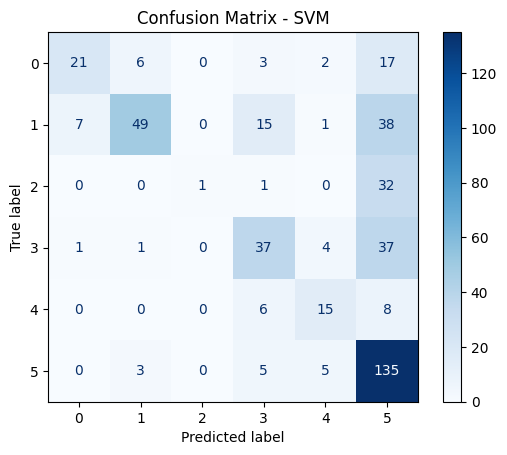


==================== LogisticRegression ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        49
           1       0.69      0.55      0.61       110
           2       0.45      0.26      0.33        34
           3       0.53      0.53      0.53        80
           4       0.36      0.59      0.45        29
           5       0.69      0.76      0.72       148

    accuracy                           0.61       450
   macro avg       0.56      0.56      0.55       450
weighted avg       0.61      0.61      0.60       450



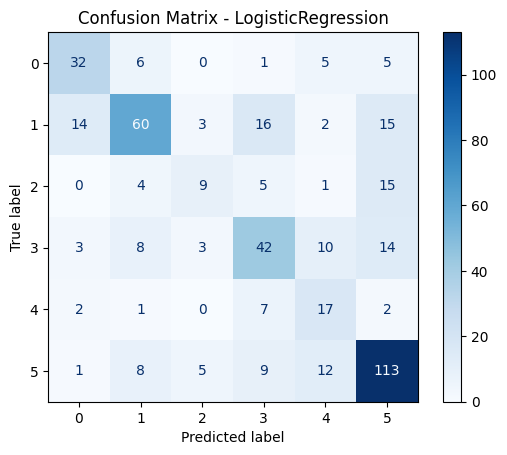


Distribusi hasil prediksi Logistic Regression (jumlah per label):
Label '0': 52 data
Label '1': 87 data
Label '2': 20 data
Label '3': 80 data
Label '4': 47 data
Label '5': 164 data

==================== RandomForest ====================
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        49
           1       0.79      0.37      0.51       110
           2       0.50      0.03      0.06        34
           3       0.44      0.50      0.47        80
           4       0.28      0.66      0.40        29
           5       0.63      0.80      0.70       148

    accuracy                           0.55       450
   macro avg       0.54      0.49      0.45       450
weighted avg       0.60      0.55      0.53       450



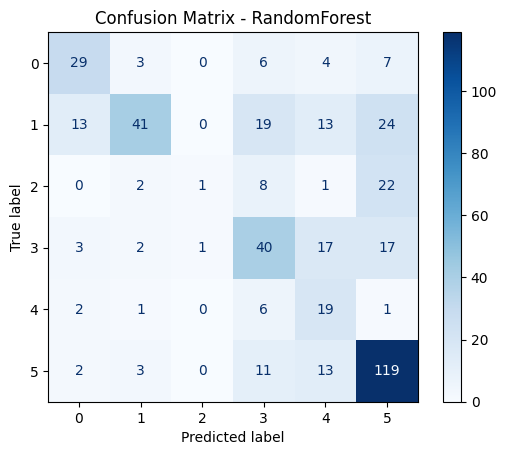

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 4️⃣ Model definitions
models = {
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 5️⃣ Training & Evaluation
for name, model in models.items():
    print(f"\n==================== {name} ====================")
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_tfidf)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

       # 🔹 Khusus untuk Logistic Regression: tampilkan jumlah prediksi per label
    if name == 'LogisticRegression':
        print("\nDistribusi hasil prediksi Logistic Regression (jumlah per label):")
        unique_labels, counts = np.unique(y_pred, return_counts=True)
        for lbl, cnt in zip(unique_labels, counts):
            print(f"Label '{lbl}': {cnt} data")

In [ ]:
mask = (y_test == 2)
wrong_pred = test_df[mask].copy()
wrong_pred['pred'] = y_pred[mask]
wrong_pred[wrong_pred['pred'] != 2][['comment_tokens', 'pred']].head(10)

,comment_tokens,pred
20,"['banyak', 'yang', 'minta', 'solusi', 'untuk',...",5
24,"['soalnya', 'bukan', 'psikolog', 'tetapi', 'te...",5
28,"['saya', 'heran', 'sama', 'orang', 'yang', 'ng...",5
34,"['saya', 'pernah', 'dibully', 'direndahkan', '...",5
45,"['memang', 'orang', 'yang', 'tidak', 'merasaka...",3
52,"['yang', 'paling', 'membuat', 'sakit', 'hati',...",5
66,"['yap', 'sesuatu', 'yang', 'lebih', 'buruk', '...",3
74,"['jangan', 'nanggung', 'sendiri', 'tetapi', 's...",5
83,"['orang', 'memandang', 'remeh', 'penyintas', '...",3
88,"['kamu', 'kurang', 'ibadah', 'kamu', 'manusia'...",1
